In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
N,D_in, H, D_out = 2, 100, 50, 1

In [ ]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)
print(x)
print("====")
print(y)

(2, 100)
(2, 1)
[[ 0.96416125 -0.06830201  0.10554939  0.54306118 -0.1221536   0.26195829
   1.19294657  1.07593619 -1.46439067 -0.78115335 -1.86769621 -0.21204991
  -1.35577241  0.59775057  0.0503722   0.72484567 -2.30198973  1.1226379
  -1.16669321 -1.76715656  1.46297213  2.02850213 -0.48873125  0.00925804
   0.23085736 -0.02154062  1.61762647  0.35968388  0.75142495  1.24781217
   1.38001138  3.2486999  -0.69114868 -0.5791223  -1.68392622  0.11482671
  -0.30837456 -0.92485216  0.97242855 -1.02231824 -0.45473926 -1.04442511
   0.52390575  0.42140083 -0.67768273  1.70913583  0.55169725 -0.09962527
  -0.22895077  0.03912873 -1.54460611 -0.22374909  0.37287972  0.2510712
   1.07996224  0.33957035  0.11316355  0.0048676  -0.26752058 -0.33792336
  -0.5756983   1.01364041 -0.29631357 -0.79551606  2.16457725  1.2247453
  -0.62356406 -0.15980934 -0.55486146 -1.70279266 -0.09819341  0.80296125
  -0.23704809  1.93344438 -1.16570965  0.6874095   0.5487995   1.57642185
   0.36074377  0.12038063

In [ ]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [ ]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):
  h = x.dot(w1)
  h_relu = np.maximum(h, 0)
  y_pred = h_relu.dot(w2)
  y_pred_list.append(y_pred[0][0])

  loss = np.square(y_pred - y).sum()
  loss_list.append(loss)
  print(t, loss)

  grad_y_pred = 2.0 * (y_pred -y)
  grad_w2 = h_relu.T.dot(grad_y_pred)
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[h < 0] = 0
  grad_w1 = x.T.dot(grad_h)

  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2

0 11903.770121747519
1 11718.362379493597
2 11536.45728393533
3 11357.973971678744
4 11182.833807957977
5 11010.960314944543
6 10842.279102718541
7 10676.717802788955
8 10514.206004055264
9 10354.675191107637
10 10198.058684768208
11 10044.291584780158
12 9893.310714556012
13 9745.05456790049
14 9599.463257627274
15 9456.478465992825
16 9316.043396873743
17 9178.102729617805
18 9042.602574501541
19 8909.49042973092
20 8778.715139923694
21 8650.226856015544
22 8523.976996534226
23 8399.91821018845
24 8278.004339720746
25 8158.190386975652
26 8040.432479136696
27 7924.687836087623
28 7810.914738855403
29 7699.07249909414
30 7589.121429570855
31 7481.0228156158955
32 7374.738887501964
33 7270.232793717714
34 7167.4685751027955
35 7066.411139813048
36 6967.0262390855705
37 6869.280443774603
38 6773.141121630621
39 6678.576415295896
40 6585.555220990901
41 6494.047167867229
42 6404.02259800315
43 6315.452547019469
44 6228.308725293837
45 6142.563499752662
46 6058.189876220622
47 5975.161482

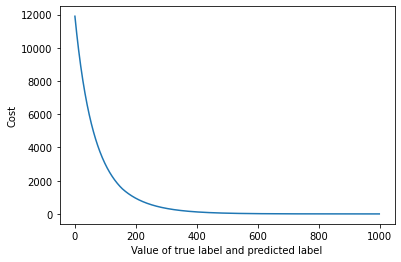

In [ ]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()